# New Zealand EDA

Goal of the project -
To recommend timeline for reopening/lockdown.
For this, the main quantities that we'll be trying to estimate throughout time for a given region are:
- Number of available beds at hospitals.
- Number of active cases.
- Number of cumulated deaths.
- Number of recovered.

In [1]:

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df=pd.read_csv(r'C:\Users\DELL\Downloads\owid-covid-data.csv')


#df(owid-covid-data.csv) is a collection of the COVID-19 data maintained by Our World in Data.

In [2]:

#basic data analysis,quick view of data set
#showes first five rows of the data se
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [3]:
df.shape

(50011, 41)

This data has 41 columns and 50011 rows

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [202]:
#  data set have 50011 rows and 41 columns

# EDA for New Zealand
From covid 19 world dataset Select data where location=New Zealand

In [5]:

df_nzl=df[(df['location']=='New Zealand')]
#nzl=New Zealand

In [6]:
df_nzl.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34882,NZL,Oceania,New Zealand,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34883,NZL,Oceania,New Zealand,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34884,NZL,Oceania,New Zealand,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34885,NZL,Oceania,New Zealand,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34886,NZL,Oceania,New Zealand,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917


In [6]:
df_nzl.info()
#41 columns and two data types object and float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         290 non-null    object 
 1   continent                        290 non-null    object 
 2   location                         290 non-null    object 
 3   date                             290 non-null    object 
 4   total_cases                      281 non-null    float64
 5   new_cases                        281 non-null    float64
 6   new_cases_smoothed               284 non-null    float64
 7   total_deaths                     281 non-null    float64
 8   new_deaths                       281 non-null    float64
 9   new_deaths_smoothed              284 non-null    float64
 10  total_cases_per_million          281 non-null    float64
 11  new_cases_per_million            281 non-null    float64
 12  new_cases_smooth

In [7]:
df_nzl.shape


(290, 41)

# New Zealand has 290  entries and 41 rows

In [8]:
#sort New Zealand data set (sort() method sorts the list ascending by default)
df_nzl=df_nzl.reindex(sorted(df_nzl.columns), axis=1)

In [9]:
df_nzl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aged_65_older                    290 non-null    float64
 1   aged_70_older                    290 non-null    float64
 2   cardiovasc_death_rate            290 non-null    float64
 3   continent                        290 non-null    object 
 4   date                             290 non-null    object 
 5   diabetes_prevalence              290 non-null    float64
 6   extreme_poverty                  0 non-null      float64
 7   female_smokers                   290 non-null    float64
 8   gdp_per_capita                   290 non-null    float64
 9   handwashing_facilities           0 non-null      float64
 10  hospital_beds_per_thousand       290 non-null    float64
 11  human_development_index          290 non-null    float64
 12  iso_code        

# Number of missing values per column.

In [10]:
# number of missing value per column
df_nzl.isnull().sum()

aged_65_older                        0
aged_70_older                        0
cardiovasc_death_rate                0
continent                            0
date                                 0
diabetes_prevalence                  0
extreme_poverty                    290
female_smokers                       0
gdp_per_capita                       0
handwashing_facilities             290
hospital_beds_per_thousand           0
human_development_index              0
iso_code                             0
life_expectancy                      0
location                             0
male_smokers                         0
median_age                           0
new_cases                            9
new_cases_per_million                9
new_cases_smoothed                   6
new_cases_smoothed_per_million       6
new_deaths                           9
new_deaths_per_million               9
new_deaths_smoothed                  6
new_deaths_smoothed_per_million      6
new_tests                

In [ ]:
#remove extreme_poverty and handwashing_facilities ,it is havivg no entries
# remove the duplicate columns columns

In [12]:

df_nzl.drop(['extreme_poverty','handwashing_facilities','date','location','iso_code','continent','location','new_cases_smoothed','life_expectancy',
            'new_deaths_smoothed',"new_tests_smoothed",'total_deaths_per_million','total_cases_per_million','new_tests_smoothed_per_thousand',
            'new_deaths_smoothed_per_million','new_deaths_per_million','new_cases_smoothed_per_million',
             'new_cases_per_million'],axis=1, inplace=True)


In [14]:
df_nzl.info()
#after drop we got 24 cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aged_65_older               290 non-null    float64
 1   aged_70_older               290 non-null    float64
 2   cardiovasc_death_rate       290 non-null    float64
 3   diabetes_prevalence         290 non-null    float64
 4   female_smokers              290 non-null    float64
 5   gdp_per_capita              290 non-null    float64
 6   hospital_beds_per_thousand  290 non-null    float64
 7   human_development_index     290 non-null    float64
 8   male_smokers                290 non-null    float64
 9   median_age                  290 non-null    float64
 10  new_cases                   281 non-null    float64
 11  new_deaths                  281 non-null    float64
 12  new_tests                   219 non-null    float64
 13  new_tests_per_thousand      2


# Impute the missing values


In [ ]:
df_nzl.isnull().sum()

In [17]:
# before filling up the missing value ,check the skewness of data
df_nzl.skew(axis = 0, skipna = True) 

aged_65_older                 0.000000
aged_70_older                 0.000000
cardiovasc_death_rate         0.000000
diabetes_prevalence           0.000000
female_smokers                0.000000
gdp_per_capita                0.000000
hospital_beds_per_thousand    0.000000
human_development_index       0.000000
male_smokers                  0.000000
median_age                    0.000000
new_cases                     4.093064
new_deaths                    5.866464
new_tests                     2.541249
new_tests_per_thousand        2.541150
population                    0.000000
population_density            0.000000
positive_rate                 3.457795
stringency_index              0.902152
tests_per_case                4.194971
total_cases                  -0.757121
total_deaths                 -0.553039
total_tests                   0.471441
total_tests_per_thousand      0.471441
dtype: float64

In [18]:
df_nzl.describe()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,gdp_per_capita,hospital_beds_per_thousand,human_development_index,male_smokers,median_age,...,new_tests_per_thousand,population,population_density,positive_rate,stringency_index,tests_per_case,total_cases,total_deaths,total_tests,total_tests_per_thousand
count,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,...,219.000000,290.0,2.900000e+02,212.000000,281.000000,194.000000,281.000000,281.000000,2.190000e+02,219.000000
mean,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,1.720000e+01,3.790000e+01,...,0.967671,4822233.0,1.820600e+01,0.002792,39.010996,2960.401577,879.330961,14.395018,4.145765e+05,85.971868
std,3.736798e-14,3.914740e-14,6.833001e-13,3.380912e-14,7.829481e-14,1.895019e-10,1.156628e-14,3.336427e-16,9.253023e-14,1.992959e-13,...,0.851437,0.0,6.405939e-14,0.006976,29.448573,4194.561154,564.160521,10.467152,3.112206e+05,64.538643
min,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,1.720000e+01,3.790000e+01,...,0.002000,4822233.0,1.820600e+01,0.000000,0.000000,25.713000,0.000000,0.000000,3.120000e+02,0.065000
25%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,1.720000e+01,3.790000e+01,...,0.443500,4822233.0,1.820600e+01,0.000000,19.440000,1177.078250,28.000000,0.000000,1.514595e+05,31.408500
50%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,1.720000e+01,3.790000e+01,...,0.741000,4822233.0,1.820600e+01,0.001000,31.940000,1871.398500,1154.000000,22.000000,3.874350e+05,80.343000
75%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,1.720000e+01,3.790000e+01,...,1.235000,4822233.0,1.820600e+01,0.001000,68.980000,3349.410000,1219.000000,22.000000,6.653630e+05,137.978500
max,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,1.720000e+01,3.790000e+01,...,5.395000,4822233.0,1.820600e+01,0.039000,96.300000,28707.000000,1520.000000,25.000000,1.011657e+06,209.790000


# Impute the missing values.
# If a features  have high skewness replace it with median,
#features having normal distribution ,replace with mean


In [19]:
df_nzl["new_cases"].describe()

count    281.000000
mean       5.409253
std       13.958604
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       95.000000
Name: new_cases, dtype: float64

In [21]:
df_nzl["new_cases"].median()

1.0

In [23]:
df_nzl["new_cases"].skew()

4.093063612922536

In [24]:
#repalcing new_cases missing values with median value
df_nzl["new_cases"].fillna(df_nzl["new_cases"].median(), inplace = True)

In [26]:
df_nzl["new_tests"].skew()

2.541248942899423

In [27]:
df_nzl["new_tests"].median()

3573.0

In [28]:
df_nzl["new_tests"].fillna(df_nzl["new_tests"].median(), inplace = True)

In [29]:
df_nzl["positive_rate"].skew()

3.4577948054861936

In [30]:
df_nzl["positive_rate"].median()

0.001

In [31]:
df_nzl["positive_rate"].fillna(df_nzl["positive_rate"].median(), inplace = True)

In [32]:
# impute - stringency_index 
df_nzl["stringency_index"].describe()

count    281.000000
mean      39.010996
std       29.448573
min        0.000000
25%       19.440000
50%       31.940000
75%       68.980000
max       96.300000
Name: stringency_index, dtype: float64

In [33]:
df_nzl["stringency_index"].skew()

0.9021519952720499

In [34]:
df_nzl["stringency_index"].median()

31.94

In [241]:
# impute - stringency_index  with mean

In [35]:
df_nzl["stringency_index"].fillna(df_nzl["stringency_index"].mean(), inplace = True)

In [243]:
#impute missing value of tests_per_case

In [36]:
df_nzl["tests_per_case"].median()

1871.3985

In [37]:
df_nzl["tests_per_case"].skew()

4.194971134873704

In [38]:
df_nzl["tests_per_case"].fillna(df_nzl["tests_per_case"].median(), inplace = True)

In [248]:
#impute missing value of total_cases

In [39]:
df_nzl["total_cases"].skew()

-0.7571214414903531

In [251]:
#replace the missing value of "new_deaths" with mean()

In [40]:
df_nzl["total_tests"].skew()

0.47144093810340476

In [41]:
#replace the missing value of "total_cases" with mean()
df_nzl["total_tests"].fillna(df_nzl["total_tests"].mean(), inplace = True)

In [42]:
#repalce missing value of total_deaths with mean()
df_nzl["total_cases"].fillna(df_nzl["total_cases"].mean(), inplace = True)

In [43]:
df_nzl["total_deaths"].skew()

-0.5530394992168461

In [44]:
#repace "total_deaths" with mean
df_nzl["total_deaths"].fillna(df_nzl["total_deaths"].mean(), inplace = True)

In [45]:
df_nzl["tests_units"].describe()

count                 219
unique                  1
top       tests performed
freq                  219
Name: tests_units, dtype: object

In [46]:
df_nzl["tests_units"].fillna(df_nzl["tests_units"].mode(), inplace = True)

In [47]:
df_nzl["new_deaths"].skew()

5.866463534141966

In [48]:
df_nzl["new_deaths"].median()

0.0

In [49]:
#replace missing value of "new_death" with median value
df_nzl["new_deaths"].fillna(df_nzl["new_deaths"].median(), inplace = True)

In [50]:
df_nzl["tests_units"].isnull().sum()

71

In [51]:
df_nzl["tests_units"].describe()

count                 219
unique                  1
top       tests performed
freq                  219
Name: tests_units, dtype: object

In [52]:
df_nzl["tests_units"].value_counts()

tests performed    219
Name: tests_units, dtype: int64

In [53]:
df_nzl.isnull().sum()

aged_65_older                  0
aged_70_older                  0
cardiovasc_death_rate          0
diabetes_prevalence            0
female_smokers                 0
gdp_per_capita                 0
hospital_beds_per_thousand     0
human_development_index        0
male_smokers                   0
median_age                     0
new_cases                      0
new_deaths                     0
new_tests                      0
new_tests_per_thousand        71
population                     0
population_density             0
positive_rate                  0
stringency_index               0
tests_per_case                 0
tests_units                   71
total_cases                    0
total_deaths                   0
total_tests                    0
total_tests_per_thousand      71
dtype: int64

In [ ]:
new_tests_per_thousand

In [54]:
df_nzl["new_tests_per_thousand"].describe()

count    219.000000
mean       0.967671
std        0.851437
min        0.002000
25%        0.443500
50%        0.741000
75%        1.235000
max        5.395000
Name: new_tests_per_thousand, dtype: float64

In [55]:
df_nzl["new_tests_per_thousand"].skew()

2.5411496504310334

In [58]:
#replace missing value of "new_tests_per_thousand" with median value
df_nzl["new_tests_per_thousand"].fillna(df_nzl["new_tests_per_thousand"].median(), inplace = True)

In [57]:
df_nzl["total_tests_per_thousand"].skew()

0.47144109103731785

In [ ]:
df_nzl

In [63]:
#replace missing value of "new_tests_per_thousand" with mean value
df_nzl["total_tests_per_thousand"].fillna(df_nzl["total_tests_per_thousand"].mean(), inplace = True)

In [64]:
# Inspect missing values in the dataset
print(df_nzl.isnull().values.sum())

71


# Separate the Object data type and Numeric data type

In [66]:

#df_nr_1_num=df_nr_1.select_dtypes(np.number)
#df_nr_1_obj=df_nr_1.select_dtypes('object')
df_nzl_obj=df_nzl.select_dtypes('object')
df_nzl_num=df_nzl.select_dtypes(np.number)

In [68]:
df_nzl_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tests_units  219 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [69]:
df_nzl_obj['tests_units'].value_counts()

tests performed    219
Name: tests_units, dtype: int64

Convert categorical variable  tests_units into dummy(one hot encoding)

In [71]:
# Convert categorical variable  tests_units into dummy(one hot encoding)
test_performed=pd.get_dummies(df_nzl_obj['tests_units'])

In [72]:
# convert categorical vaiable (tests_units) to numeric 
df_nzl_num = pd.concat([df_nzl_num,test_performed], axis=1)



In [74]:
df_nzl_num.info()
#24 cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aged_65_older               290 non-null    float64
 1   aged_70_older               290 non-null    float64
 2   cardiovasc_death_rate       290 non-null    float64
 3   diabetes_prevalence         290 non-null    float64
 4   female_smokers              290 non-null    float64
 5   gdp_per_capita              290 non-null    float64
 6   hospital_beds_per_thousand  290 non-null    float64
 7   human_development_index     290 non-null    float64
 8   male_smokers                290 non-null    float64
 9   median_age                  290 non-null    float64
 10  new_cases                   290 non-null    float64
 11  new_deaths                  290 non-null    float64
 12  new_tests                   290 non-null    float64
 13  new_tests_per_thousand      2

In [75]:
df_nzl_num.head()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,gdp_per_capita,hospital_beds_per_thousand,human_development_index,male_smokers,median_age,...,population,population_density,positive_rate,stringency_index,tests_per_case,total_cases,total_deaths,total_tests,total_tests_per_thousand,tests performed
34882,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,17.2,37.9,...,4822233.0,18.206,0.001,39.010996,1871.3985,0.0,0.0,414576.493151,85.971868,0
34883,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,17.2,37.9,...,4822233.0,18.206,0.001,0.000000,1871.3985,0.0,0.0,414576.493151,85.971868,0
34884,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,17.2,37.9,...,4822233.0,18.206,0.001,0.000000,1871.3985,0.0,0.0,414576.493151,85.971868,0
34885,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,17.2,37.9,...,4822233.0,18.206,0.001,0.000000,1871.3985,0.0,0.0,414576.493151,85.971868,0
34886,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,17.2,37.9,...,4822233.0,18.206,0.001,0.000000,1871.3985,0.0,0.0,414576.493151,85.971868,0


In [77]:
# number of missing value per column for numerical datatypes
df_nzl_num.isnull().sum()

aged_65_older                 0
aged_70_older                 0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
gdp_per_capita                0
hospital_beds_per_thousand    0
human_development_index       0
male_smokers                  0
median_age                    0
new_cases                     0
new_deaths                    0
new_tests                     0
new_tests_per_thousand        0
population                    0
population_density            0
positive_rate                 0
stringency_index              0
tests_per_case                0
total_cases                   0
total_deaths                  0
total_tests                   0
total_tests_per_thousand      0
tests performed               0
dtype: int64

In [76]:
print(df_nzl_num.isnull().values.sum())

0


In [78]:
df_nzl_num.shape

(290, 24)

Standardization (Standard Scalar)

In [368]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() 
#df_NZL_num_scaled = scaler.fit_transform(df_NZL_num)

In [369]:
#print(df_NZL_num_scaled.mean(axis=0))
#print(df_NZL_num_scaled.std(axis=0))

[ 1.00000000e+00  0.00000000e+00 -1.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00 -2.45014736e-17
 -1.22507368e-16 -1.22507368e-17  4.90029473e-17 -7.35044209e-17
  4.90029473e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.83761052e-16 -2.45014736e-17  0.00000000e+00  0.00000000e+00
  9.80058946e-17  9.80058946e-17]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1.]


# Exploratory data analysis

# Univarate Analysis

Visualization

Text(0.5, 1.0, 'Histogram bar graph of Total_Cases')

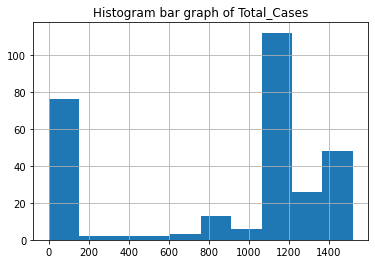

In [82]:
df_nzl_num.total_cases.hist()
plt.plot()
plt.title('Histogram bar graph of Total_Cases')

From the above graph we see data is not normally distributed and it is unimodal.



Text(0.5, 1.0, 'Histogram bar graph of New_cases')

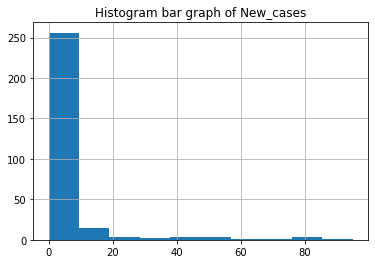

In [83]:
#new_cases_smoothed
df_nzl_num.new_cases.hist()
plt.plot()
plt.title('Histogram bar graph of New_cases')

From the above image we see data is not normally distributed it is right skewed.
At the bebnning new cases were high and it decreased quickly

Text(0.5, 1.0, 'Histogram bar graph of New_deaths')

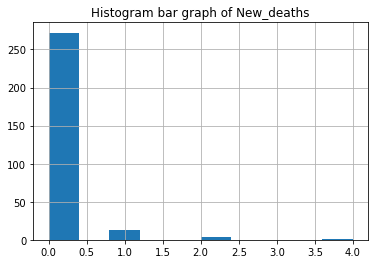

In [85]:
df_nzl_num.new_deaths.hist()
plt.plot()
plt.title('Histogram bar graph of New_deaths')

New_deaths were high in numbers at the beginning and decreased suddenly

In [ ]:
#total_deaths

Text(0.5, 1.0, 'Histogram bar graph of Total_deaths')

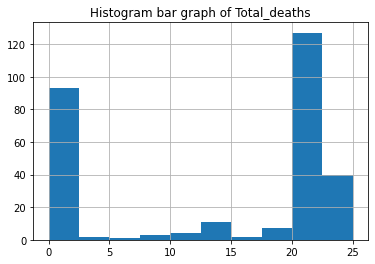

In [86]:
df_nzl_num.total_deaths.hist()
plt.plot()
plt.title('Histogram bar graph of Total_deaths')

In [ ]:
From the above graph we see data is not normally distributed
deaths were high in the beginning and decreased quickly and increased again

Text(0.5, 1.0, 'Histogram bar graph of New_tests')

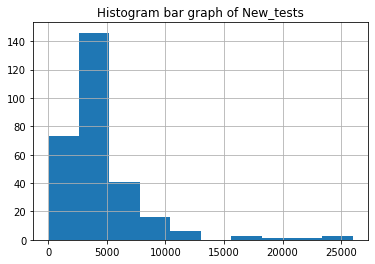

In [87]:
df_nzl_num.new_tests.hist()
plt.plot()
plt.title('Histogram bar graph of New_tests')

In [ ]:
The above graph is right tailed and unimodal where New_test is decreased

# Bivariate analysis

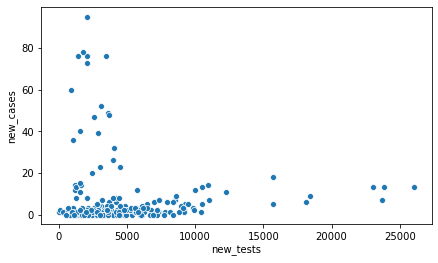

In [88]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['new_tests'], y=df_nzl_num["new_cases"])

In [89]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df_nzl_num['new_tests']).corr(df_nzl_num['new_cases'])

-0.013688723249981017

New_tests and New_cases are  negatively correlated ( one variable increases as the other decreases)
(we need to do new_tests to keep the new-cases low)

In [92]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df_nzl_num['new_cases']).corr(df_nzl_num["positive_rate"])

0.9001161107311694

Positive_rate increases with raise of new _cases

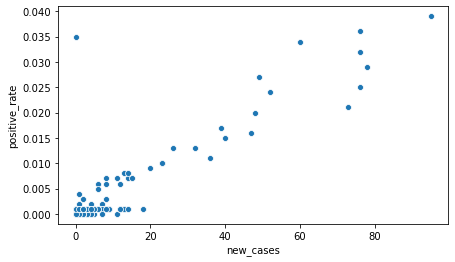

In [93]:

plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['new_cases'], y=df_nzl_num["positive_rate"])

New_cases and positive _rate are correlated with each other
new_cases increases  with the rate of positivity 

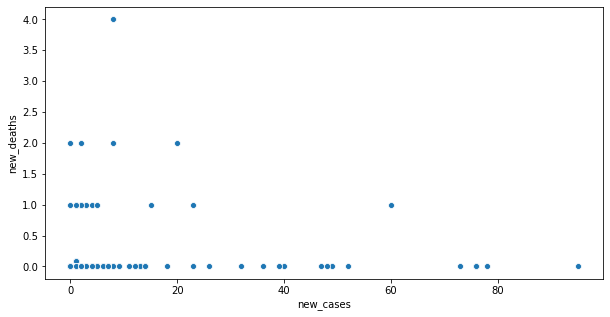

In [392]:
#number of available beds at hospital

plt.figure(figsize=(10,5))
sns.scatterplot(y=df_NZL_num['new_deaths'], x=df_NZL_num["new_cases"])


In [ ]:
To decrease the new death we need to do more new_tests

In [94]:
(df_nzl_num['new_deaths']).corr(df_nzl_num["new_cases"])

0.0517159450226946

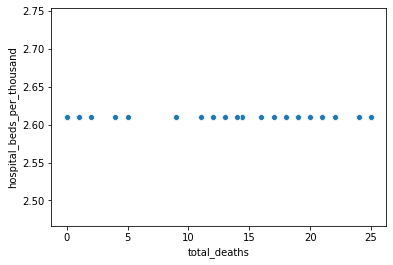

In [95]:
#plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['total_deaths'], y=df_nzl_num["hospital_beds_per_thousand"])

In [395]:
(df['total_deaths']).corr(df["hospital_beds_per_thousand"])

-0.01650637502098442

toatal_deaths and hospital_beds_per_thousand is not correlated with each other.

<ipython-input-96-52962610a0d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NZL_num['total_tests']=(df_nzl_num['total_tests'])/df_nzl_num['total_tests'].max()


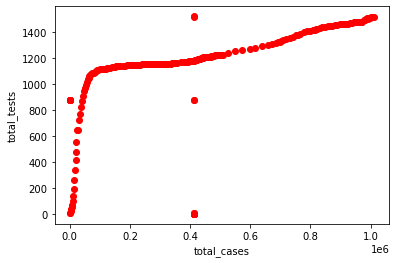

In [96]:

df_NZL_num['total_tests']=(df_nzl_num['total_tests'])/df_nzl_num['total_tests'].max()
plt.scatter(y = df_nzl_num['total_cases'], x =df_nzl_num['total_tests'], color='red')
plt.xlabel("total_cases")
plt.ylabel("total_tests")
plt.show()

In [ ]:
positive correlation between total_test and total_cases

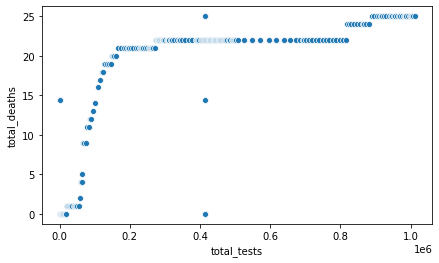

In [97]:
plt.figure(figsize=(7,4))
sns.scatterplot(y=df_nzl_num['total_deaths'], x=df_nzl_num["total_tests"])

Positive correlation between total_deaths and total_tests

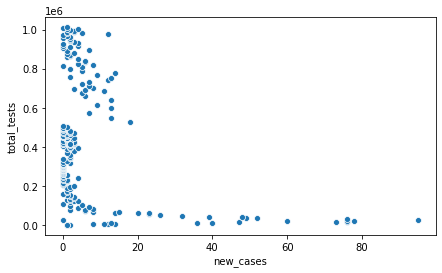

In [98]:

plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['new_cases'], y=df_nzl_num['total_tests'])

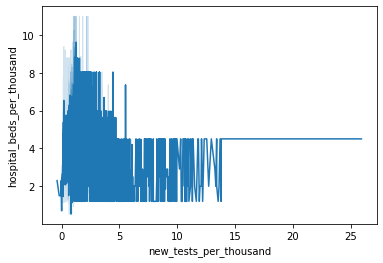

In [99]:
#new_tests_per_thousand
#line plot 
sns.lineplot(x=df['new_tests_per_thousand'], y=df["hospital_beds_per_thousand"],data=df_nzl)


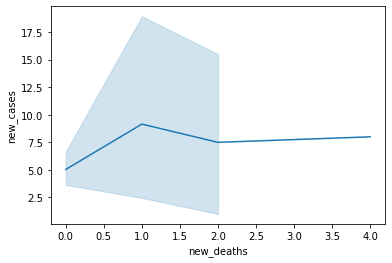

In [101]:
#line plot 
sns.lineplot(x='new_deaths',y='new_cases', data=df_nzl_num)

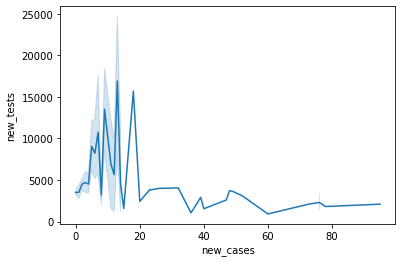

In [102]:
#line plot 
sns.lineplot(y='new_tests',x='new_cases', data=df_nzl_num)

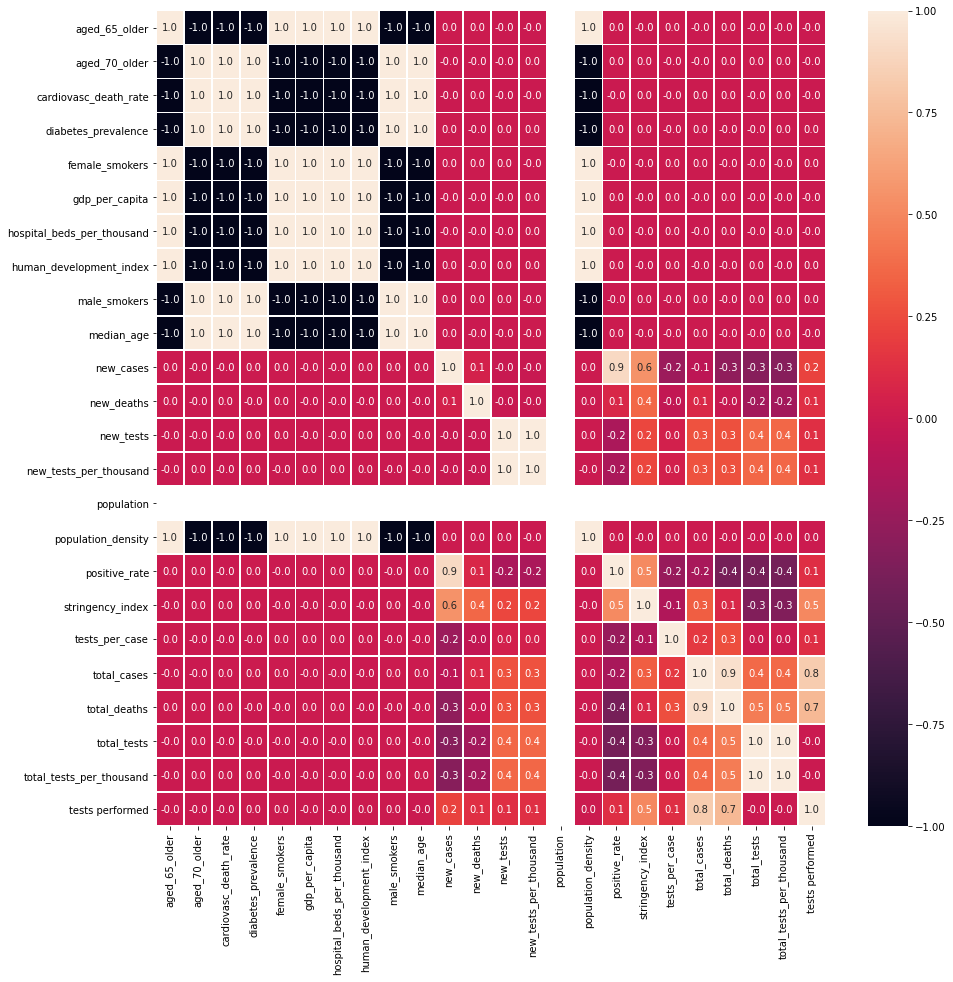

In [104]:

#correlation map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_nzl_num.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

#age_70_older,ccardiovasc_death_rate and diabetes_prevalence are corrrelated to each  we can use one feature and drop all  other.
#female_smokers,gdp_per_capita,hospital_beds_per_thousand,hospital_bed_per_thousand,human_development_index,life_expectancy are corelated so we can use one of them for our model develpoment and drop other feature
#male_smokers and median_age are correlated with each other ,i have used "median_age"
#new_cases and new_cases_smoothed are correlated with each other ,drop new_cases_smoothed
#

In [110]:
drop_list=['cardiovasc_death_rate','diabetes_prevalence','female_smokers','gdp_per_capita','male_smokers','human_development_index',
           'population','aged_65_older','aged_70_older',
            'population_density']

In [111]:
df_nzl_num_cols=df_nzl_num.drop(drop_list,axis=1)
#df_nr_1=df_nr.drop(drop_list,axis=1)

In [112]:
df_nzl_num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hospital_beds_per_thousand  290 non-null    float64
 1   median_age                  290 non-null    float64
 2   new_cases                   290 non-null    float64
 3   new_deaths                  290 non-null    float64
 4   new_tests                   290 non-null    float64
 5   new_tests_per_thousand      290 non-null    float64
 6   positive_rate               290 non-null    float64
 7   stringency_index            290 non-null    float64
 8   tests_per_case              290 non-null    float64
 9   total_cases                 290 non-null    float64
 10  total_deaths                290 non-null    float64
 11  total_tests                 290 non-null    float64
 12  total_tests_per_thousand    290 non-null    float64
 13  tests performed             2

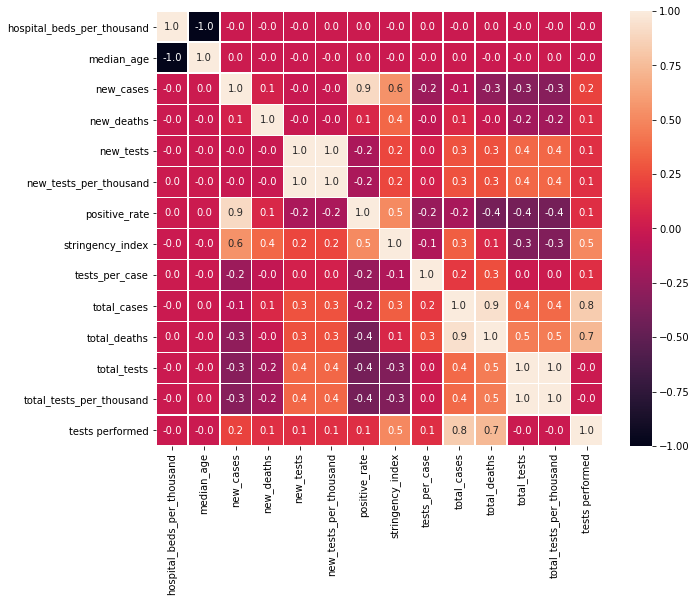

In [113]:
#correlation map
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_nzl_num_cols.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)

# Standardization

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df_nzl_num_cols_scaled = scaler.fit_transform(df_nzl_num_cols)

In [117]:
print(df_nzl_num_cols_scaled.mean(axis=0))
print(df_nzl_num_cols_scaled.std(axis=0))

[ 0.00000000e+00  0.00000000e+00 -1.22507368e-17 -1.22507368e-17
  4.90029473e-17  0.00000000e+00  4.90029473e-17  2.45014736e-17
 -2.45014736e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.90029473e-17  0.00000000e+00]
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
